In [1]:
%matplotlib inline

import pandas as pd
import networkx as nx

# Ignore matplotlib warnings
import warnings
warnings.filterwarnings("ignore")

# Using NetworkX to find centrality of points in your graph

## Read in our data

In [3]:
df = pd.read_csv("clubs.csv")
df.set_index('name', inplace=True)
df = df.pivot(columns='club', values='club').astype(bool).astype(int)
df.head(3)

club,Boston Committee,London Enemies,Long Room Club,Loyal Nine,North Caucus,St Andrews Lodge,Tea Party
name,,,,,,,
Adams John,0,0,1,0,1,0,0
Adams Samuel,1,1,1,0,1,0,0
Allen Dr,0,0,0,0,1,0,0


## Build the adjacency matrix

Except I'm pretty sure technically it isn't an adjacency matrix, since an adjacency matrix is only `1` to mean "connected" and `0` to mean "not connected."

In [5]:
people_adj = df.dot(df.T)
people_adj.head(3)

name,Adams John,Adams Samuel,Allen Dr,Appleton Nathaniel,Ash Gilbert,Austin Benjamin,Austin Samuel,Avery John,Baldwin Cyrus,Ballard John,...,Whitwell William,Williams Jeremiah,Williams Jonathan,Williams Thomas,Willis Nathaniel,Wingfield William,Winslow John,Winthrop John,Wyeth Joshua,Young Thomas
name,,,,,,,,,,,,,,,,,,,,,
Adams John,2,2,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,1
Adams Samuel,2,4,1,2,0,1,1,1,1,1,...,1,0,1,0,0,0,1,2,0,2
Allen Dr,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1


## Build a graph...

We'll draw it first, but **we're going to use it research, not for drawing!**

Renaming nodes with {0: 'Adams John', 1: 'Adams Samuel', 2: 'Allen Dr', 3: 'Appleton Nathaniel', 4: 'Ash Gilbert', 5: 'Austin Benjamin', 6: 'Austin Samuel', 7: 'Avery John', 8: 'Baldwin Cyrus', 9: 'Ballard John', 10: 'Barber Nathaniel', 11: 'Barnard Samuel', 12: 'Barrett Samuel', 13: 'Bass Henry', 14: 'Bell William', 15: 'Bewer James', 16: 'Blake Increase', 17: 'Boit John', 18: 'Bolter Thomas', 19: 'Boyer Peter', 20: 'Boynton Richard', 21: 'Brackett Jos', 22: 'Bradford John', 23: 'Bradlee David', 24: 'Bradlee Josiah', 25: 'Bradlee Nathaniel', 26: 'Bradlee Thomas', 27: 'Bray George', 28: 'Breck William', 29: 'Brimmer Herman', 30: 'Brimmer Martin', 31: 'Broomfield Henry', 32: 'Brown Enoch', 33: 'Brown Hugh', 34: 'Brown John', 35: 'Bruce Stephen', 36: 'Burbeck Edward', 37: 'Burbeck William', 38: 'Burt Benjamin', 39: 'Burton Benjamin', 40: 'Cailleteau Edward', 41: 'Callendar Elisha', 42: 'Campbell Nicholas', 43: 'Cazneau Capt', 44: 'Chadwell Mr', 45: 'Champney Caleb', 46: 'Chase Thomas', 4

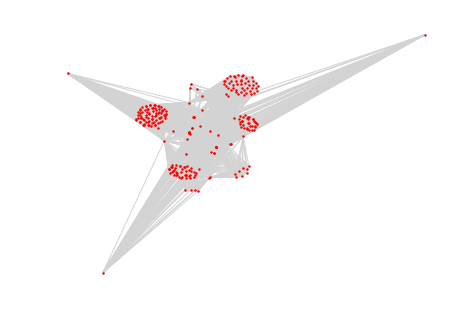

In [12]:
%matplotlib inline
import networkx as nx

people_graph = nx.from_numpy_matrix(people_adj.values)

renamed = dict(zip(people_graph.nodes(), people_adj.columns))
print("Renaming nodes with", renamed)
nx.relabel_nodes(people_graph, renamed, copy=False)

nx.draw(people_graph, node_size=2, edge_color='lightgrey')

### Horrifying, let's try it again.

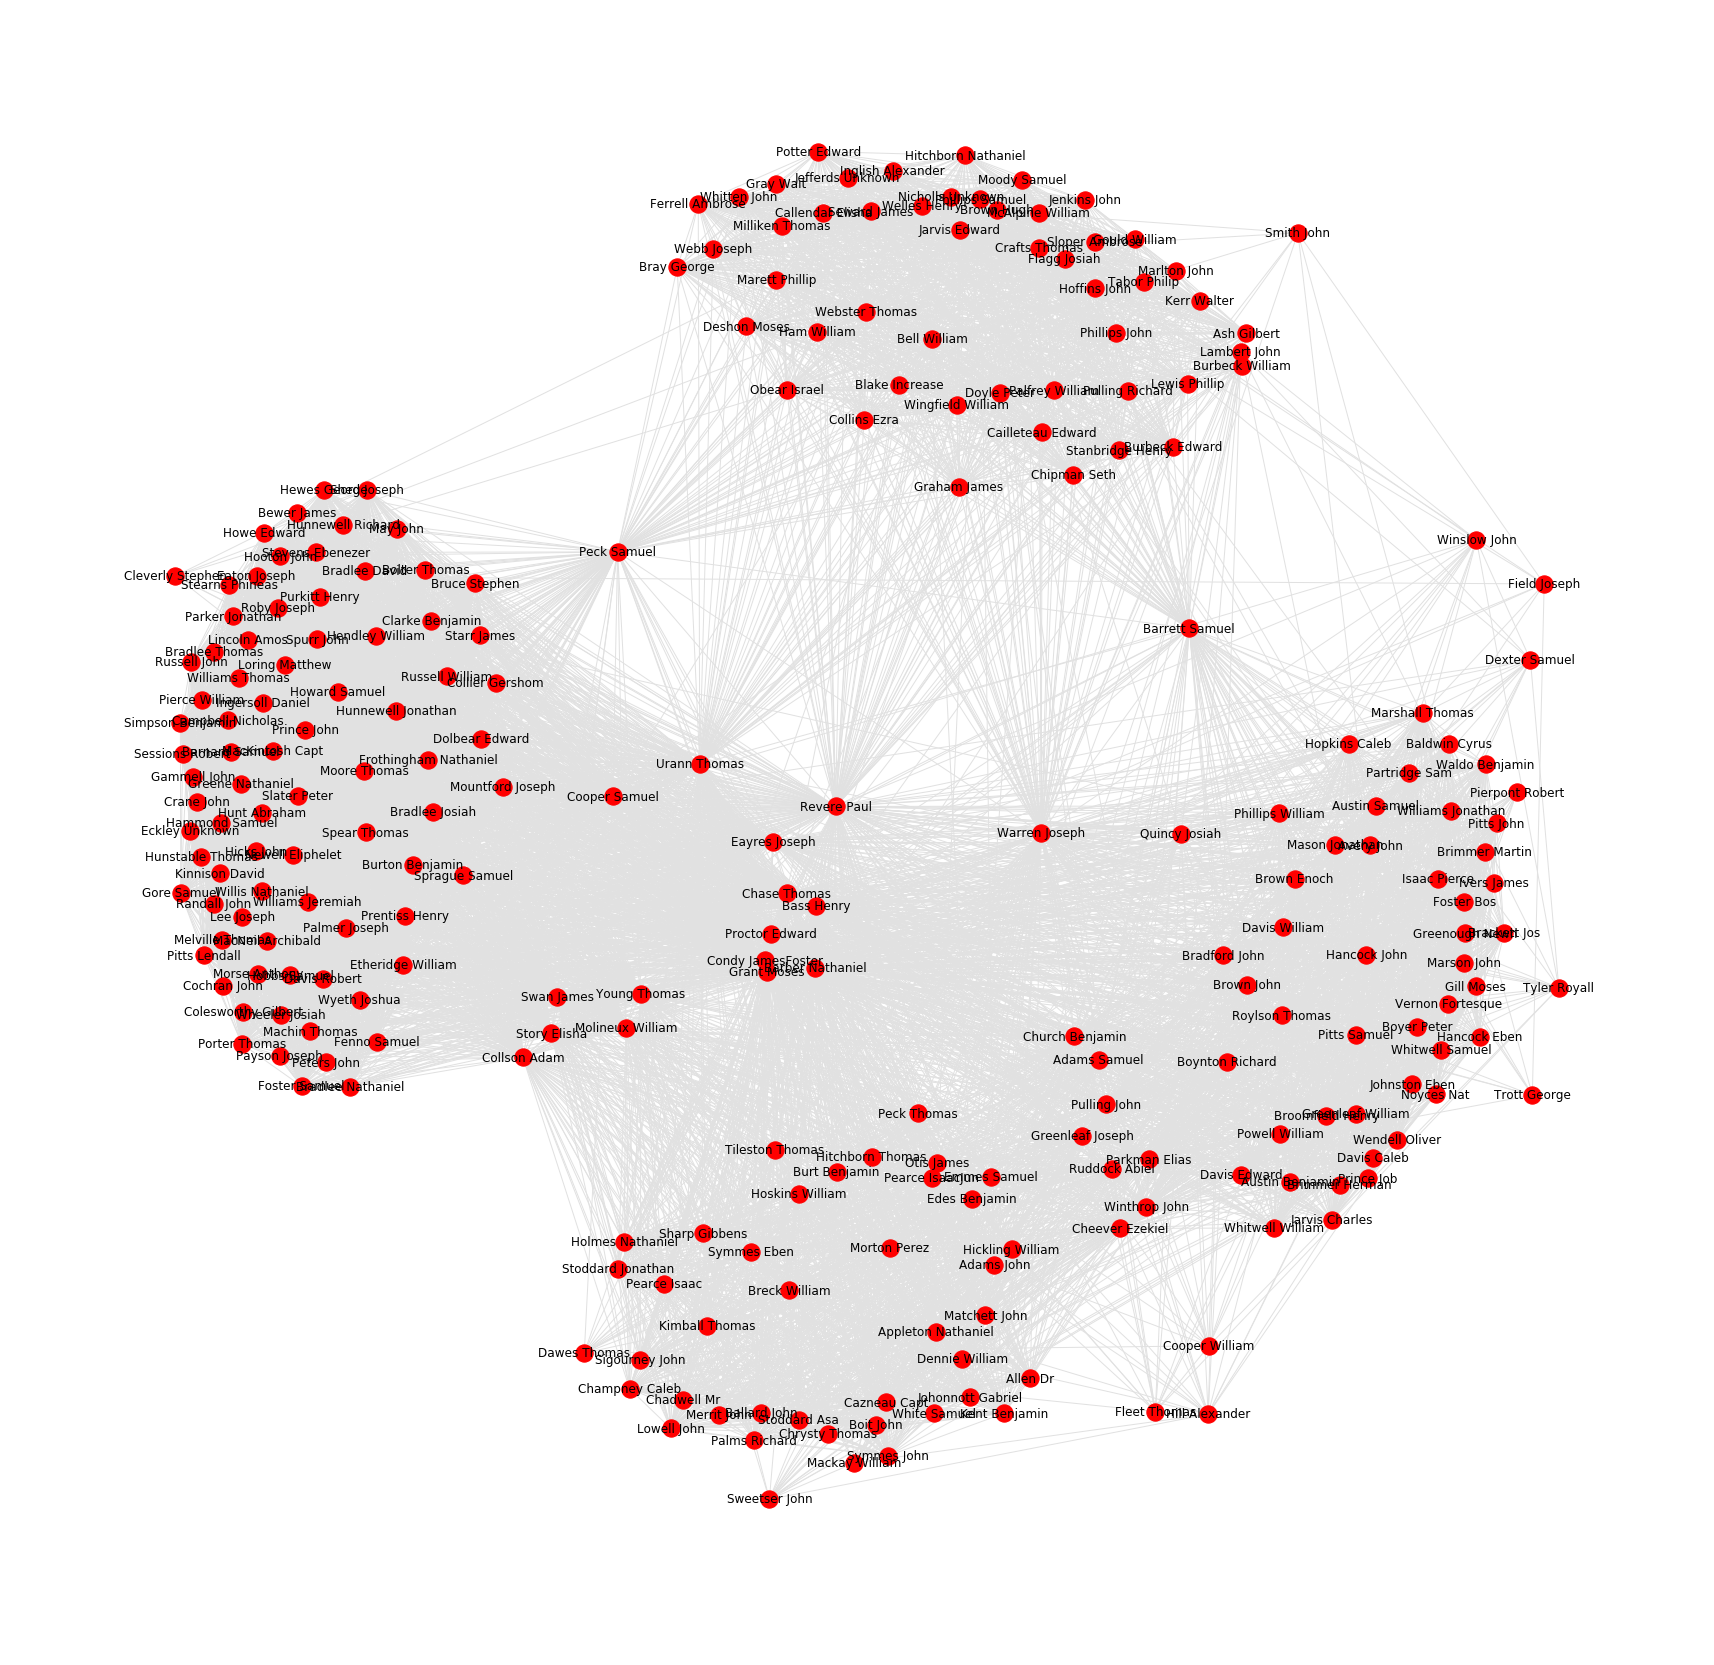

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,30))

# 1. Create the graph
people_graph = nx.from_numpy_matrix(people_adj.values)

# 1.5. Rename our nodes so it isn't 0, 1, 2, 3, 4...
renamed = dict(zip(people_graph.nodes(), people_adj.columns))
nx.relabel_nodes(people_graph, renamed, copy=False)

# 2. Create a layout for our nodes 
layout = nx.spring_layout(people_graph, iterations=20, k=0.25)

# 3. Draw the parts we want
nx.draw_networkx_edges(people_graph, layout, edge_color='#e1e1e1')
nx.draw_networkx_nodes(people_graph, layout)
nx.draw_networkx_labels(people_graph, layout)

# 4. Turn off the axis because I know you don't want it
plt.axis('off')

# 5. Tell matplotlib to show it
plt.show()

Hmmm. Paul Revere and Warren Joseph seem to be in the middle, but are they actually important?

# Research topic: Centrality

You can read more at [Wikipedia](https://en.wikipedia.org/wiki/Centrality), but centrality is **how connected you are to everyone else**. A common one is **closeness centrality**, and you can see more in the [networkx documentation](https://networkx.github.io/documentation/development/reference/algorithms.centrality.html).

Let's say we make a graph (the same one we did before)...

In [19]:
# 1. Build the graph
people_graph = nx.from_numpy_matrix(people_adj.values)

# 2. Relabel the nodes with names instead of numbers
renamed = dict(zip(people_graph.nodes(), people_adj.columns))
nx.relabel_nodes(people_graph, renamed, copy=False)

You don't have to draw it! You can use it to then do calculate, like the aforementioned **closeness centrality**. You give networkx the graph you made, and it figures out how central every node is.

In [22]:
# Use networkx to calculate closeness in our graph
people_centrality = nx.closeness_centrality(people_graph)
people_centrality

{'Adams John': 0.5802752293577982,
 'Adams Samuel': 0.6537467700258398,
 'Allen Dr': 0.5647321428571429,
 'Appleton Nathaniel': 0.5802752293577982,
 'Ash Gilbert': 0.5572687224669604,
 'Austin Benjamin': 0.5685393258426966,
 'Austin Samuel': 0.5685393258426966,
 'Avery John': 0.5776255707762558,
 'Baldwin Cyrus': 0.5685393258426966,
 'Ballard John': 0.5647321428571429,
 'Barber Nathaniel': 0.8083067092651757,
 'Barnard Samuel': 0.6170731707317073,
 'Barrett Samuel': 0.640506329113924,
 'Bass Henry': 0.8083067092651757,
 'Bell William': 0.5572687224669604,
 'Bewer James': 0.6170731707317073,
 'Blake Increase': 0.5572687224669604,
 'Boit John': 0.5647321428571429,
 'Bolter Thomas': 0.6170731707317073,
 'Boyer Peter': 0.5685393258426966,
 'Boynton Richard': 0.5816091954022988,
 'Brackett Jos': 0.5685393258426966,
 'Bradford John': 0.5816091954022988,
 'Bradlee David': 0.6170731707317073,
 'Bradlee Josiah': 0.6170731707317073,
 'Bradlee Nathaniel': 0.6170731707317073,
 'Bradlee Thomas': 0.

In [26]:
eig_centrality = nx.eigenvector_centrality(people_graph)
eig_centrality

{'Adams John': 0.043013431281714316,
 'Adams Samuel': 0.08627092883379778,
 'Allen Dr': 0.036550282437213893,
 'Appleton Nathaniel': 0.04782108610845371,
 'Ash Gilbert': 0.008977228114293244,
 'Austin Benjamin': 0.031986693880843645,
 'Austin Samuel': 0.031986693880843645,
 'Avery John': 0.03598684345980668,
 'Baldwin Cyrus': 0.031986693880843645,
 'Ballard John': 0.036550282437213893,
 'Barber Nathaniel': 0.16184149972615802,
 'Barnard Samuel': 0.08203371973686074,
 'Barrett Samuel': 0.04096392199513692,
 'Bass Henry': 0.15457084563388132,
 'Bell William': 0.008977228114293244,
 'Bewer James': 0.08203371973686074,
 'Blake Increase': 0.008977228114293244,
 'Boit John': 0.036550282437213893,
 'Bolter Thomas': 0.08203371973686074,
 'Boyer Peter': 0.031986693880843645,
 'Boynton Richard': 0.04325749755208345,
 'Brackett Jos': 0.031986693880843645,
 'Bradford John': 0.04325749755208345,
 'Bradlee David': 0.08203371973686074,
 'Bradlee Josiah': 0.08203371973686074,
 'Bradlee Nathaniel': 0.0

You can use this weird magic code to print out the top 10 most central points.

In [27]:
for name in sorted(people_centrality, key=people_centrality.get, reverse=True)[:10]:
    print(name, people_centrality[name])

Revere Paul 0.9693486590038314
Barber Nathaniel 0.8083067092651757
Bass Henry 0.8083067092651757
Chase Thomas 0.8083067092651757
Urann Thomas 0.8031746031746032
Condy JamesFoster 0.7931034482758621
Grant Moses 0.7931034482758621
Proctor Edward 0.7931034482758621
Warren Joseph 0.7485207100591716
Molineux William 0.71875


In [28]:
for name in sorted(eig_centrality, key=eig_centrality.get, reverse=True)[:10]:
    print(name, eig_centrality[name])

Revere Paul 0.1660110730137118
Barber Nathaniel 0.16184149972615802
Bass Henry 0.15457084563388132
Chase Thomas 0.15457084563388132
Condy JamesFoster 0.15057069605491827
Grant Moses 0.15057069605491827
Proctor Edward 0.15057069605491827
Molineux William 0.12985480584531456
Young Thomas 0.12985480584531456
Urann Thomas 0.1275612302883679


# Other network-y stuff

Networkx has a lot of other [algorithms you can use](https://networkx.github.io/documentation/development/reference/algorithms.html) for tasks like finding cliques or running [PageRank](https://networkx.github.io/documentation/development/reference/algorithms.link_analysis.html#module-networkx.algorithms.link_analysis.pagerank_alg) on it!

### Finding cliques

This dataset sucks for cliques, but if you have something more interesting...!

In [29]:
list(nx.find_cliques(people_graph))

[['Trott George',
  'Edes Benjamin',
  'Welles Henry',
  'Crafts Thomas',
  'Field Joseph',
  'Avery John',
  'Cleverly Stephen',
  'Bass Henry',
  'Chase Thomas',
  'Smith John'],
 ['Mackay William',
  'Church Benjamin',
  'Quincy Josiah',
  'Wendell Oliver',
  'Sweetser John',
  'Molineux William',
  'Warren Joseph',
  'Otis James',
  'Young Thomas',
  'Davis Caleb',
  'Adams Samuel',
  'Barber Nathaniel',
  'Pierpont Robert',
  'Greenleaf Joseph',
  'Boynton Richard',
  'Powell William',
  'Hill Alexander',
  'Appleton Nathaniel',
  'Bradford John',
  'Dennie William',
  'Greenleaf William'],
 ['Revere Paul',
  'Williams Jonathan',
  'Broomfield Henry',
  'Proctor Edward',
  'Ivers James',
  'Marson John',
  'Hancock Eben',
  'Ruddock Abiel',
  'Davis Caleb',
  'Prince Job',
  'Davis Edward',
  'Phillips William',
  'Mason Jonathan',
  'Hancock John',
  'Greenough Newn',
  'Gill Moses',
  'Barber Nathaniel',
  'Boynton Richard',
  'Condy JamesFoster',
  'Vernon Fortesque',
  'Pullin